In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from Feature_Enginnering import best2

In [2]:
titanic = sns.load_dataset('titanic')
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()

In [3]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [4]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['age_fare_interaction'] = df['age'] * df['fare']
df['is_child'] = (df['age'] < 12).astype(int)

In [5]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True).copy()
df.head()

survived  pclass   age  sibsp  parch     fare  family_size  \
0         0       3  22.0      1      0   7.2500            2   
1         1       1  38.0      1      0  71.2833            2   
2         1       3  26.0      0      0   7.9250            1   
3         1       1  35.0      1      0  53.1000            2   
4         0       3  35.0      0      0   8.0500            1   

   age_fare_interaction  is_child  sex_male  embarked_Q  embarked_S  
0              159.5000         0      True       False        True  
1             2708.7654         0     False       False       False  
2              206.0500         0     False       False        True  
3             1858.5000         0     False       False        True  
4              281.7500         0      True       False        True

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


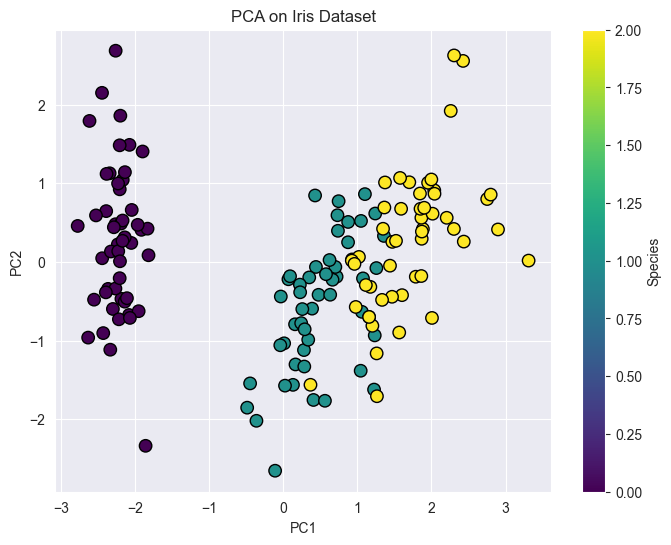

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label="Species")
plt.show()

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
df = sns.load_dataset("titanic").copy()
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]

df = df.dropna(subset=["survived"]).copy()
y = df["survived"].astype(int)

In [12]:
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

X = df[num_cols].astype(float)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [13]:
pca = PCA(n_components=2, svd_solver="full")
X_pca = pca.fit_transform(X_std)
evr = pca.explained_variance_ratio_
print("Explained variance ratio (PC1, PC2):", evr, " | cumulative:", evr.sum())

Explained variance ratio (PC1, PC2): [0.33960812 0.32520788]  | cumulative: 0.6648159969553279


In [14]:
plt.figure()
mask0 = (y == 0).values
mask1 = (y == 1).values
plt.scatter(X.loc[mask0, "age"], X.loc[mask0, "fare"], alpha=0.6, label="Died (y=0)")
plt.scatter(X.loc[mask1, "age"], X.loc[mask1, "fare"], alpha=0.6, label="Survived (y=1)")
plt.xlabel("age"); plt.ylabel("fare"); plt.title("BEFORE: Raw features (age vs fare)")
plt.legend()
plt.tight_layout()
plt.show()

# 6) AFTER: PCA-space visualization (PC1 vs PC2)
plt.figure()
plt.scatter(X_pca[mask0, 0], X_pca[mask0, 1], alpha=0.6, label="Died (y=0)")
plt.scatter(X_pca[mask1, 0], X_pca[mask1, 1], alpha=0.6, label="Survived (y=1)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("AFTER: PCA projection (PC1 vs PC2)")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = sns.load_dataset('titanic').dropna(subset=['survived']).copy()
y = df["survived"].astype(int)
num = df = ["age","fare","pclass","sibsp","parch"]
for c in num:
    df[c] = df[c].fillna(df[c].mdian())
x = df[num].astype(float)

fvals, _ = f_classif(x,y)
best2 = np.argsort(fvals)[-2:]